In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import statsmodels.api as sm
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score



# Задание 1

    Базово изучите датасет (достаточно методов info() и describe()).
    Выдвиньте пару гипотез, например, “Верно ли, что чем выше ВВП, тем выше и уровень счастья?” или “Есть ли взаимосвязь между уровнем доверия правительству и уровнем счастья?”. Постарайтесь подтвердить или опровергнуть их визуально и с помощью расчётов.
    
    Желательно, но не обязательно:
    Составьте корреляционную матрицу всех числовых признаков набора данных и визуализируйте её с помощью тепловой карты.


    Country - Name of the country.
    happiness_score - Average of responses to the primary life evaluation question from the Gallup World Poll (GWP). 0-10
    gdp_per_capita - The extent to which GDP contributes to the calculation of the Happiness Score.
    family - The extent to which Family contributes to the calculation of the Happiness Score
    health - The extent to which Life expectancy contributed to the calculation of the Happiness Score
    freedom - The extent to which Freedom contributed to the calculation of the Happiness Score
    generosity - A numerical value calculated based on poll participants’ perceptions of generosity in their country.
    government_trust - The extent to which Perception of Corruption contributes to Happiness Score.
    dystopia_residual - A score based on a hypothetical comparison to the world’s saddest country.
    continent - Region of the country.

In [2]:
df = pd.read_csv('happines_corruption.csv')


df.head()

,Country,happiness_score,gdp_per_capita,family,health,freedom,generosity,government_trust,dystopia_residual,continent,Year,social_support,cpi_score
0,Norway,7.537,1.616463,1.533524,0.796667,0.635423,0.362012,0.315964,2.277027,Europe,2015,0.0,88
1,Denmark,7.522,1.482383,1.551122,0.792566,0.626007,0.355280,0.400770,2.313707,Europe,2015,0.0,91
2,Iceland,7.504,1.480633,1.610574,0.833552,0.627163,0.475540,0.153527,2.322715,Europe,2015,0.0,79
3,Switzerland,7.494,1.564980,1.516912,0.858131,0.620071,0.290549,0.367007,2.276716,Europe,2015,0.0,86
4,Finland,7.469,1.443572,1.540247,0.809158,0.617951,0.245483,0.382612,2.430182,Europe,2015,0.0,90


In [3]:
df.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 792 entries, 0 to 791
Data columns (total 13 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Country            792 non-null    object 
 1   happiness_score    792 non-null    float64
 2   gdp_per_capita     792 non-null    float64
 3   family             792 non-null    float64
 4   health             792 non-null    float64
 5   freedom            792 non-null    float64
 6   generosity         792 non-null    float64
 7   government_trust   792 non-null    float64
 8   dystopia_residual  792 non-null    float64
 9   continent          792 non-null    object 
 10  Year               792 non-null    int64  
 11  social_support     792 non-null    float64
 12  cpi_score          792 non-null    int64  
dtypes: float64(9), int64(2), object(2)
memory usage: 80.6+ KB


In [4]:
all_columns = df.columns
for column in all_columns:
    print(f'{column}: {df[column].nunique()}')


Country: 132
happiness_score: 747
gdp_per_capita: 767
family: 396
health: 733
freedom: 734
generosity: 707
government_trust: 682
dystopia_residual: 529
continent: 6
Year: 6
social_support: 360
cpi_score: 77


    Я понял это так. что категориальные в этом датасете это continet и country.
    Числовые признаки это happiness_score, gdp_per_capita, family, health, freedom, generosity, government_trust, dystopia_residual.
    Year можно рассматривать по разному. если я будут группировать по годам или что то сравнивать по годам, то это будет категориальный признак. Верно?


In [5]:
df.describe()

,happiness_score,gdp_per_capita,family,health,freedom,generosity,government_trust,dystopia_residual,Year,social_support,cpi_score
count,792.000000,792.000000,792.000000,792.000000,792.000000,792.000000,792.000000,792.000000,792.000000,792.000000,792.000000
mean,5.473310,0.929217,0.504998,0.648691,0.427016,0.212440,0.125720,1.379277,2017.500000,0.609302,44.327020
std,1.124726,0.385774,0.552736,0.232261,0.148003,0.121660,0.109032,1.075276,1.708904,0.640754,19.508833
min,2.566900,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,2015.000000,0.000000,11.000000
25%,4.590750,0.644242,0.000000,0.510070,0.325433,0.125784,0.052862,0.000000,2016.000000,0.000000,30.000000
50%,5.485500,0.994544,0.000000,0.685397,0.439621,0.197000,0.089000,1.731948,2017.500000,0.176214,38.000000
75%,6.300500,1.228677,1.040410,0.815641,0.546280,0.273250,0.154250,2.236894,2019.000000,1.268250,57.000000
max,7.808700,2.096000,1.610574,1.141000,0.724000,0.838075,0.551910,3.602140,2020.000000,1.644000,91.000000


In [6]:
df.continent.unique()

array(['Europe', 'North America', 'Australia', 'Asia', 'South America',
       'Africa'], dtype=object)

#### гипотеза 1
    уровень счастья в европе больше чем в африке.

In [7]:
continent_means = df.groupby('continent')['happiness_score'].mean().sort_values(ascending=False)
print("Средний уровень счастья по континентам:")
print(continent_means)

Средний уровень счастья по континентам:
continent
Australia        7.289033
North America    7.000539
Europe           6.193717
South America    5.865516
Asia             5.267553
Africa           4.353944
Name: happiness_score, dtype: float64


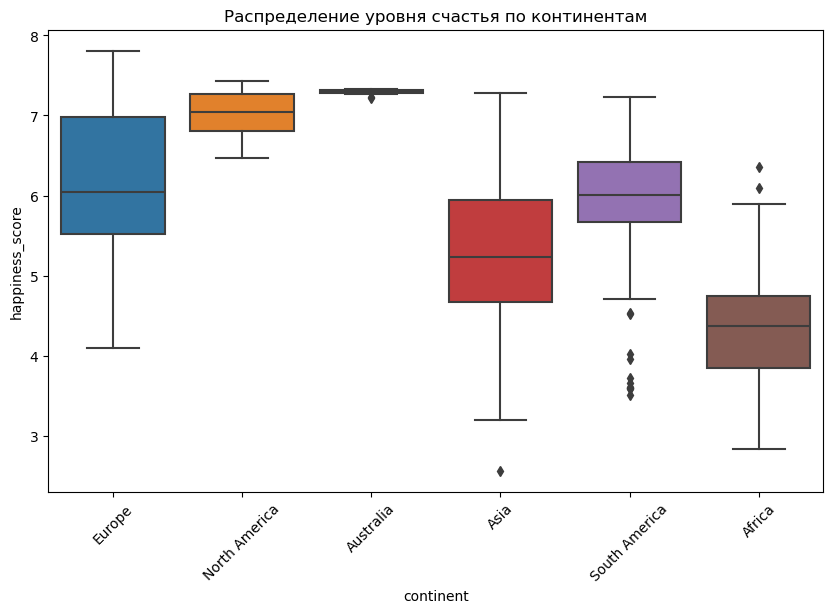

In [8]:
plt.figure(figsize=(10, 6))
sns.boxplot(data=df, x='continent', y='happiness_score')
plt.title('Распределение уровня счастья по континентам')
plt.xticks(rotation=45)
plt.show()

    да, гипотеза верна. В европе больше счастья чем в африке.



#### гипотеза 2
    
    В странах с высоким уровнем доверия правительству (government_trust) ниже уровень коррупции (выше cpi_score)

Корреляция между доверием правительству и индексом коррупции: 0.62


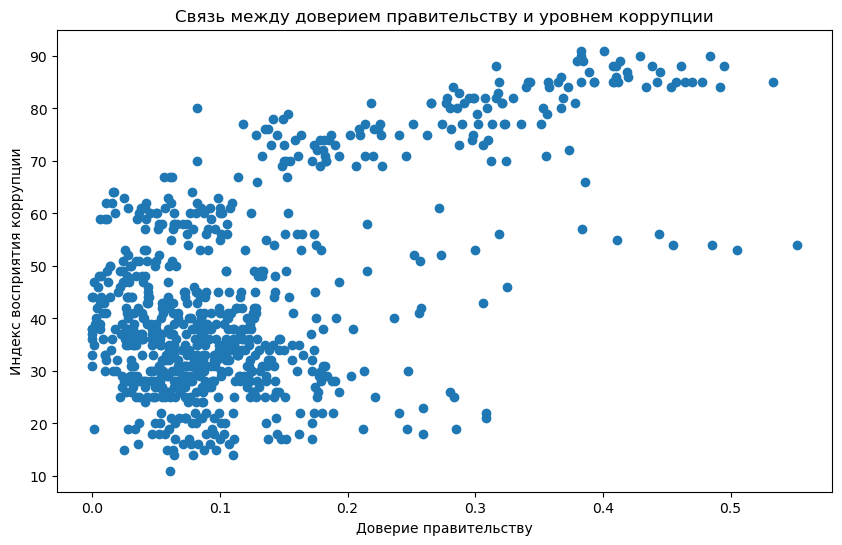

In [9]:
plt.figure(figsize=(10, 6))
plt.scatter(df['government_trust'], df['cpi_score'])
plt.xlabel('Доверие правительству')
plt.ylabel('Индекс восприятия коррупции')
plt.title('Связь между доверием правительству и уровнем коррупции')


correlation = df['government_trust'].corr(df['cpi_score'])
print(f"Корреляция между доверием правительству и индексом коррупции: {correlation:.2f}")

    да чем меньше коррупции, тем больше доверия правительству. 

#### гипотеза 3
    уровень счастья со временем растет.

In [10]:
df.groupby('Year')['happiness_score'].count()


Year
2015    132
2016    132
2017    132
2018    132
2019    132
2020    132
Name: happiness_score, dtype: int64

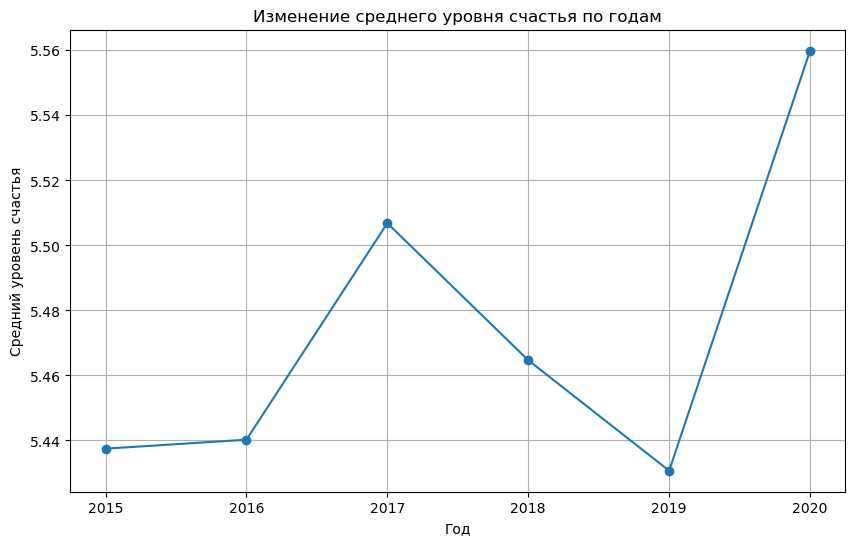

In [11]:
happiness_by_year = df.groupby('Year')['happiness_score'].mean()

plt.figure(figsize=(10, 6))
plt.plot(happiness_by_year.index, happiness_by_year.values, marker='o')
plt.title('Изменение среднего уровня счастья по годам')
plt.xlabel('Год')
plt.ylabel('Средний уровень счастья')
plt.grid(True)
plt.show()


    в целом уровень счатья растет по годам. но тут наверно не очень понятно. так как в 2019 году была пандемия и это может повлиять на уровень счастья.

#### гипотеза 4
    Чем выше ВВП (gdp_per_capita), тем выше уровень свободы (freedom)


Корреляция между ВВП и свободой: 0.34


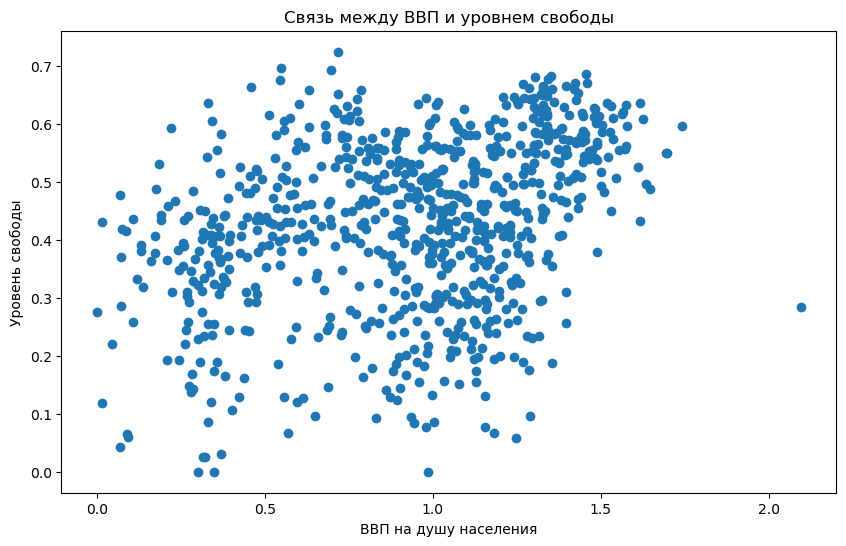

In [12]:
plt.figure(figsize=(10, 6))

plt.scatter(df['gdp_per_capita'], df['freedom'])

plt.title('Связь между ВВП и уровнем свободы')
plt.xlabel('ВВП на душу населения')
plt.ylabel('Уровень свободы')

correlation = df['gdp_per_capita'].corr(df['freedom'])
print(f"Корреляция между ВВП и свободой: {correlation:.2f}")

plt.show()

    да есть связь между ВВП и уровнем свободы. но она слабая. И ввп не гарантирует свободу.

In [13]:
numeric_columns = ['happiness_score', 'gdp_per_capita', 'family', 'health', 
                  'freedom', 'generosity', 'government_trust', 'cpi_score']

correlation_matrix = df[numeric_columns].corr()
correlation_matrix


,happiness_score,gdp_per_capita,family,health,freedom,generosity,government_trust,cpi_score
happiness_score,1.000000,0.793267,0.154946,0.753534,0.544284,0.155419,0.455477,0.693001
gdp_per_capita,0.793267,1.000000,0.218191,0.774980,0.340260,-0.018355,0.359068,0.704483
family,0.154946,0.218191,1.000000,-0.054683,0.013833,0.245437,0.114767,0.132031
health,0.753534,0.774980,-0.054683,1.000000,0.381869,-0.028882,0.312741,0.644478
freedom,0.544284,0.340260,0.013833,0.381869,1.000000,0.306240,0.473980,0.482923
generosity,0.155419,-0.018355,0.245437,-0.028882,0.306240,1.000000,0.280039,0.165972
government_trust,0.455477,0.359068,0.114767,0.312741,0.473980,0.280039,1.000000,0.620089
cpi_score,0.693001,0.704483,0.132031,0.644478,0.482923,0.165972,0.620089,1.000000


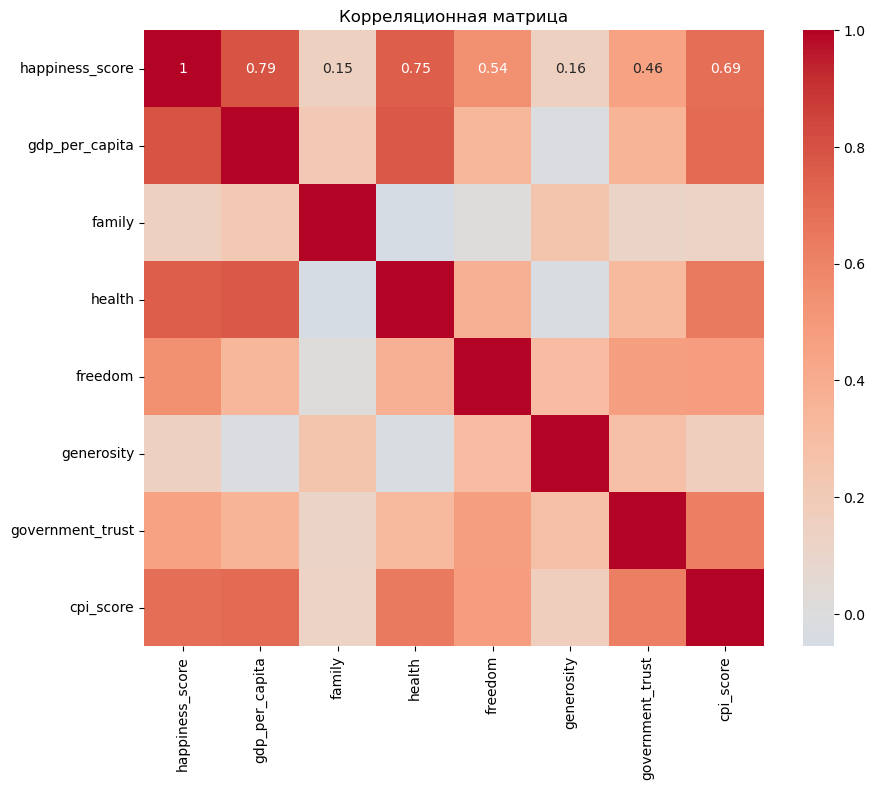

In [14]:
plt.figure(figsize=(10, 8))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', center=0)
plt.title('Корреляционная матрица')
plt.show()

    увроень счастья силльнее всего зависит от экономики и здоровья
    так же есть связь но немного слабее с доверием правительству и коррупцией
    

# Задание 2
Продолжаем изучать цены на газ в Южной Корее. Файл с данными “gas_sales_data.csv” вы сможете найти в материалах занятия (для этого набора данных вы ранее рассчитывали коэффициенты корреляции в тренажере).

В этом задании нужно окончательно ответить на вопрос:
Есть ли связь между среднемесячной температурой и потреблением газа в Южной Корее?

Для этого:

Оставьте только два столбца:'Temperature' и 'Sum'.
Постройте диаграмму рассеяния.
Постройте модель линейной регрессии для выбранных признаков.
Рассчитайте точность модели на тестовой выборке.
Выведите график остатков.


In [16]:
df = pd.read_csv('gas_sales_data.csv')
df.head()


,Year,Month,Temperature,Gangwondo,Seoul,Gyeonggido,Incheon,Gyeongsangnamdo,Gyeongsangbukdo,Gwangju,...,Daejeon,Busan,Sejong,Ulsan,Jeollanamdo,Jeollabukdo,Jeju,Chungcheongnamdo,Chungcheongbukdo,Sum
0,2000,1,-1.20,16219,662424,363014,139454,42129,55362,39465,...,52992,85787,0,69241,22508,34507,0,20158,27838,1717175
1,2000,2,-0.99,16280,689177,375937,145834,42604,52863,40674,...,53950,87282,0,70910,22310,33784,0,23492,27175,1766341
2,2000,3,6.64,14105,566528,323145,121324,35990,47282,34610,...,41898,74476,0,63627,18033,29315,0,21156,22904,1490537
3,2000,4,12.11,10364,396231,237437,91421,28698,40393,25898,...,28618,58316,0,47106,15920,19783,0,17447,16818,1096964
4,2000,5,17.59,6843,262940,169495,67239,21073,35083,18426,...,17503,45915,0,43749,13808,14375,0,14508,12299,790248


In [18]:
df.columns

Index(['Year', 'Month', 'Temperature', 'Gangwondo', 'Seoul', 'Gyeonggido',
       'Incheon', 'Gyeongsangnamdo', 'Gyeongsangbukdo', 'Gwangju', 'Daegu',
       'Daejeon', 'Busan', 'Sejong', 'Ulsan', 'Jeollanamdo', 'Jeollabukdo',
       'Jeju', 'Chungcheongnamdo', 'Chungcheongbukdo', 'Sum'],
      dtype='object')

In [19]:

df = df[['Temperature', 'Sum']]
df.head()


,Temperature,Sum
0,-1.20,1717175
1,-0.99,1766341
2,6.64,1490537
3,12.11,1096964
4,17.59,790248


In [30]:
df.describe()

,Temperature,Sum
count,252.000000,2.520000e+02
mean,13.367381,1.666574e+06
std,9.540984,7.965762e+05
min,-5.740000,4.513220e+05
25%,4.657500,1.094284e+06
50%,14.315000,1.436072e+06
75%,22.260000,2.226306e+06
max,28.560000,3.748910e+06


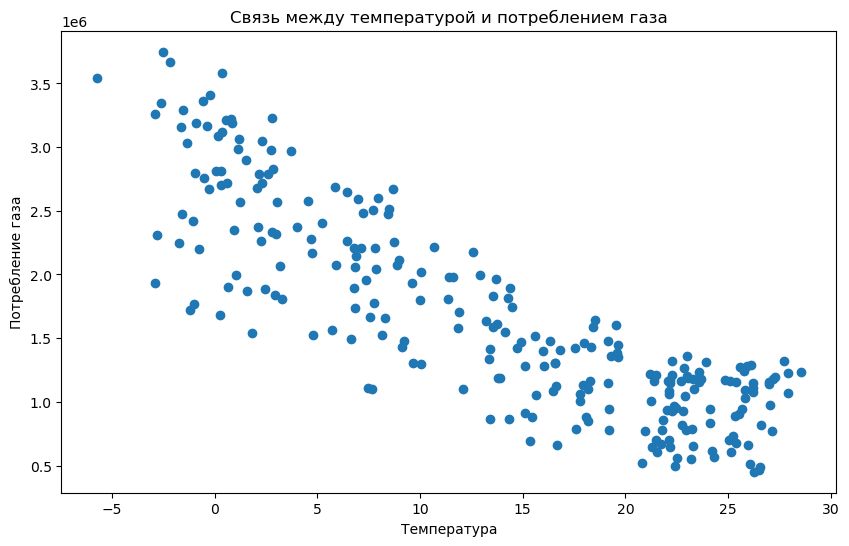

In [22]:
plt.figure(figsize=(10, 6))
plt.scatter(df['Temperature'], df['Sum'])
plt.title('Связь между температурой и потреблением газа')
plt.xlabel('Температура')
plt.ylabel('Потребление газа')
plt.show()

    судя по графику, есть связь между температурой и потреблением газа. чем ниже температура, тем больше потребление газа.

In [25]:
from sklearn.model_selection import train_test_split  
from sklearn.linear_model import LinearRegression    
from sklearn.metrics import mean_squared_error, r2_score  

In [27]:
X = df[['Temperature']]
y = df['Sum']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

model = LinearRegression()
model.fit(X_train, y_train)

y_pred = model.predict(X_test)

mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

print(f"MSE: {mse:.2f}")
print(f"R2: {r2:.2f}")

MSE: 168044393468.74
R2: 0.73


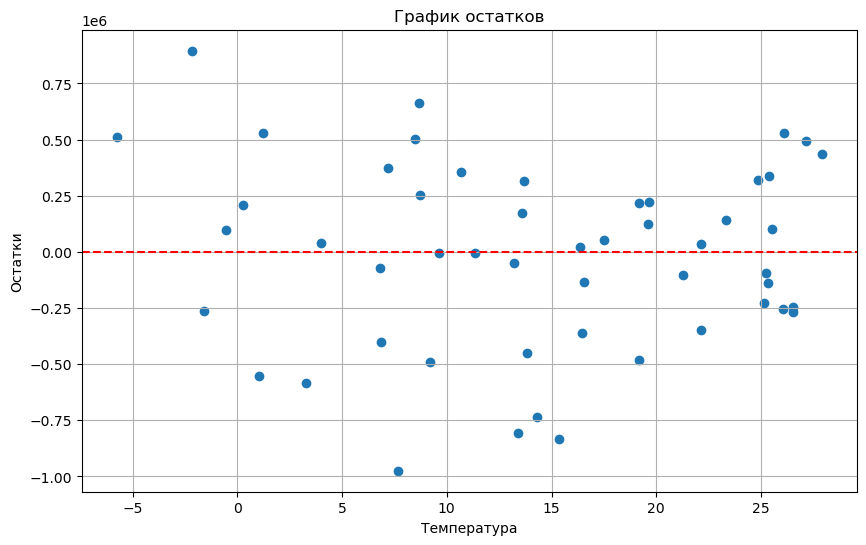

In [32]:
residuals = y_test - y_pred

plt.figure(figsize=(10, 6))
plt.scatter(X_test, residuals)
plt.axhline(y=0, color='r', linestyle='--')
plt.xlabel('Температура')
plt.ylabel('Остатки')
plt.title('График остатков')
plt.grid(True)
plt.show()